In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("C:\\Users\\Nahid\\Desktop\\EDA & Model\\churn.csv")
df = dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

RowNumber
[    1     2     3 ...  9998  9999 10000]
------------------------------------------------------------
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
------------------------------------------------------------
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
------------------------------------------------------------
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 

In [8]:
dataset['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

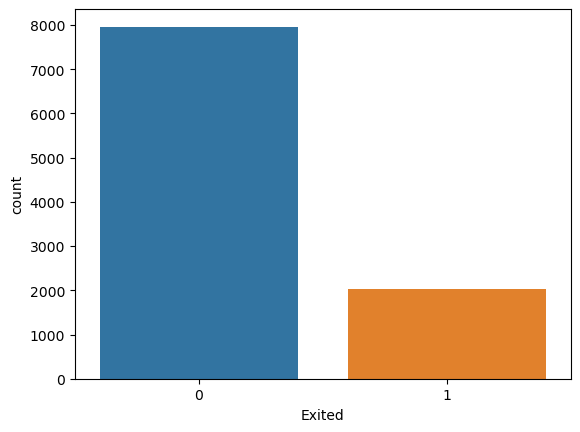

In [9]:
sns.countplot(data=dataset, x='Exited')


In [10]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Surname', 'Geography', 'Gender']

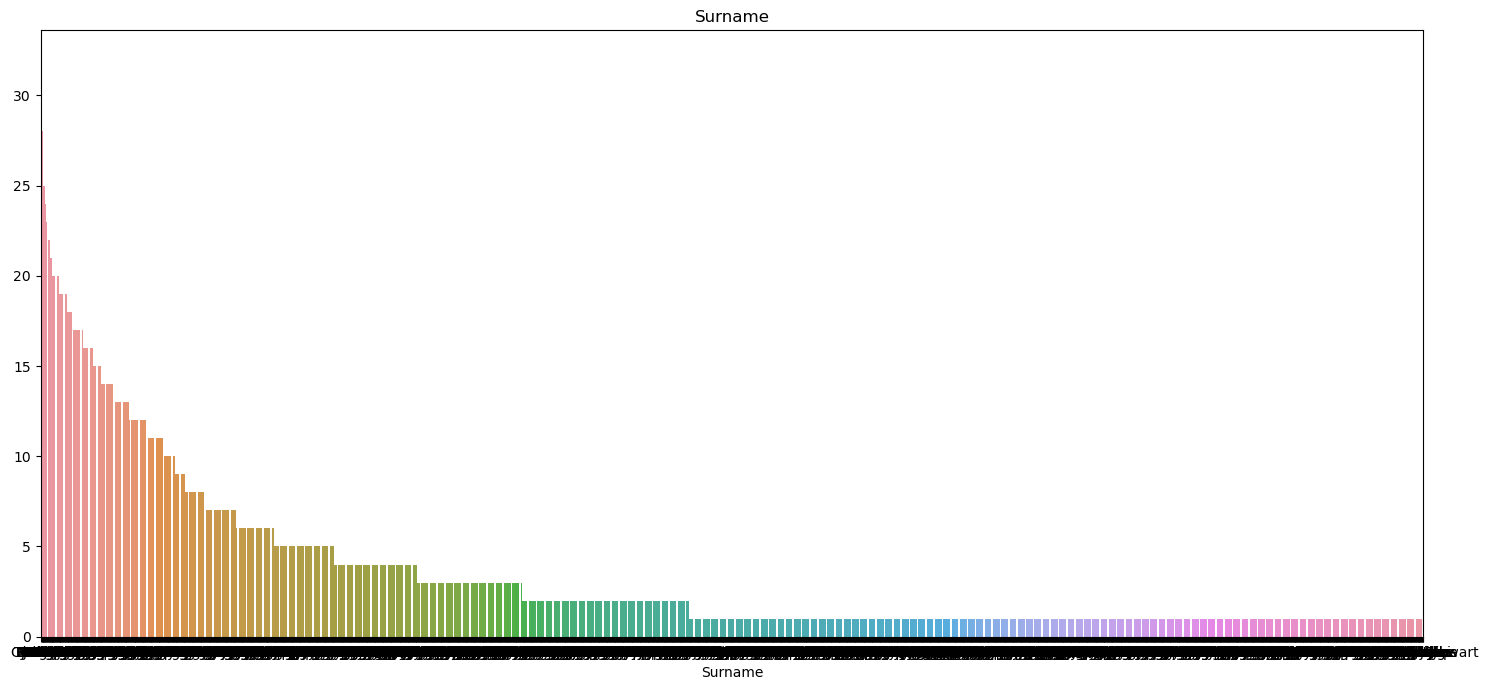

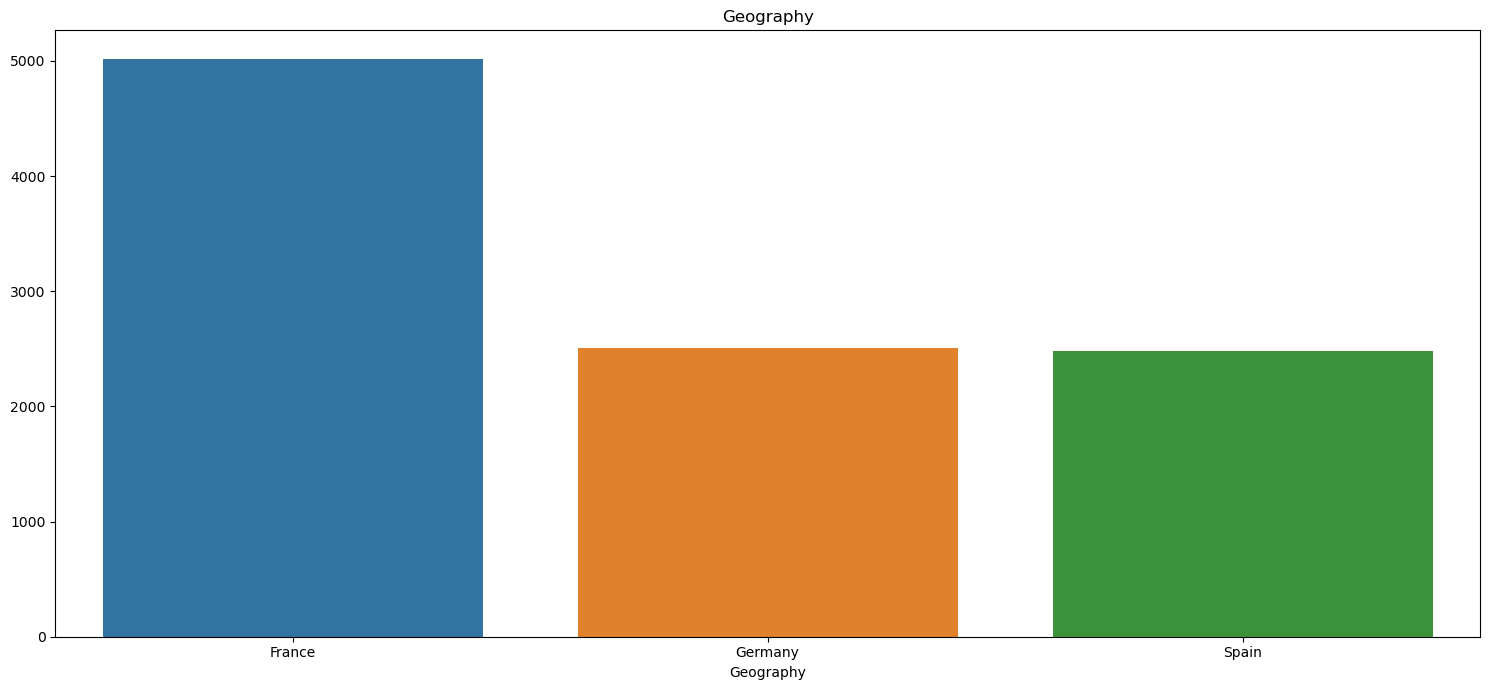

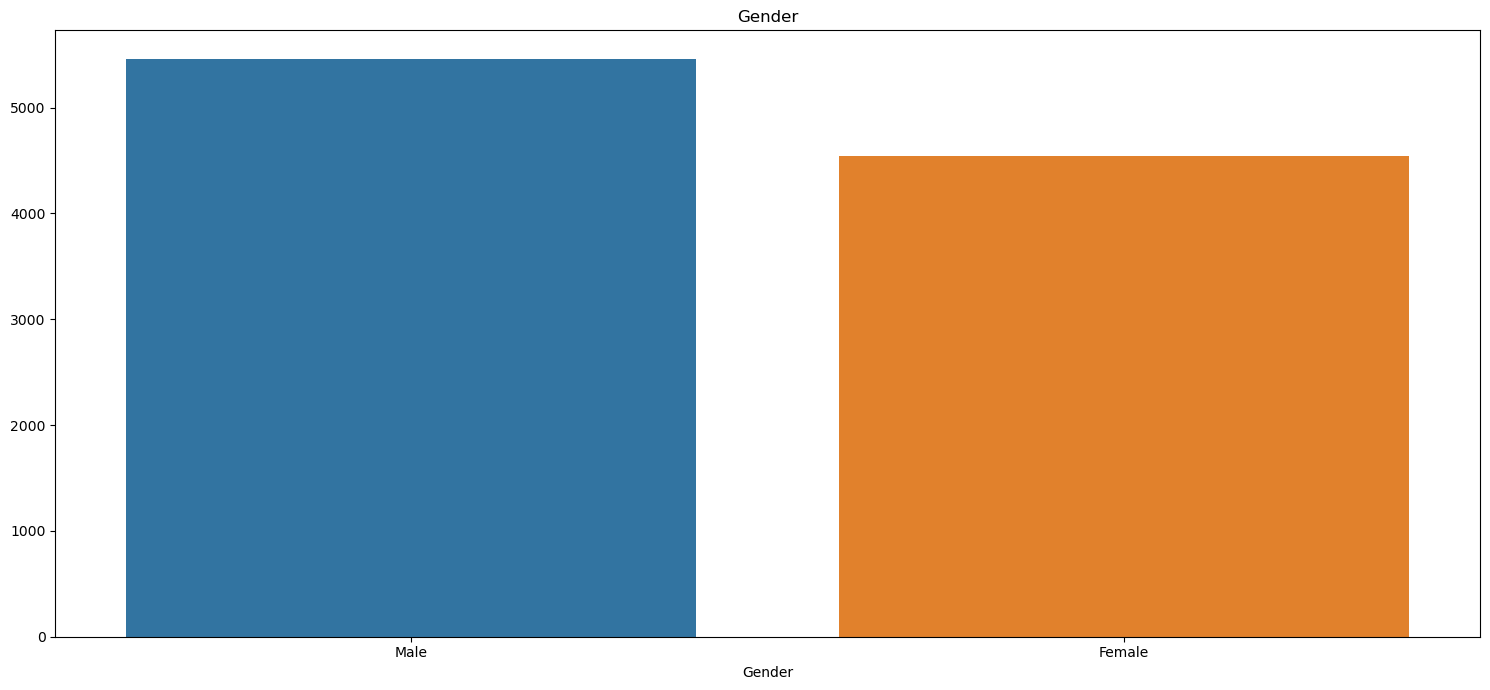

In [12]:
for col in category_cols:
    plt.figure(figsize=(15, 7))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [13]:
dataset.corr(numeric_only = 'true')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

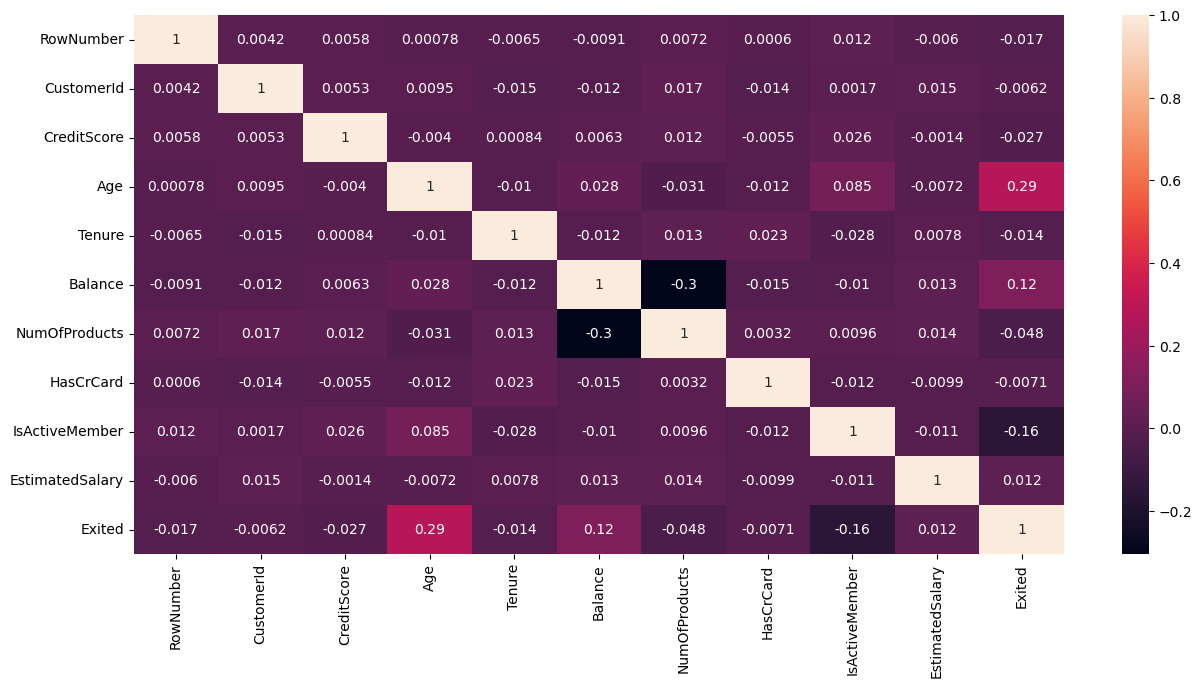

In [14]:
cor_mat=df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [15]:
num_features=['CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
       'Age', 'HasCrCard', 'IsActiveMember','EstimatedSalary','Exited']

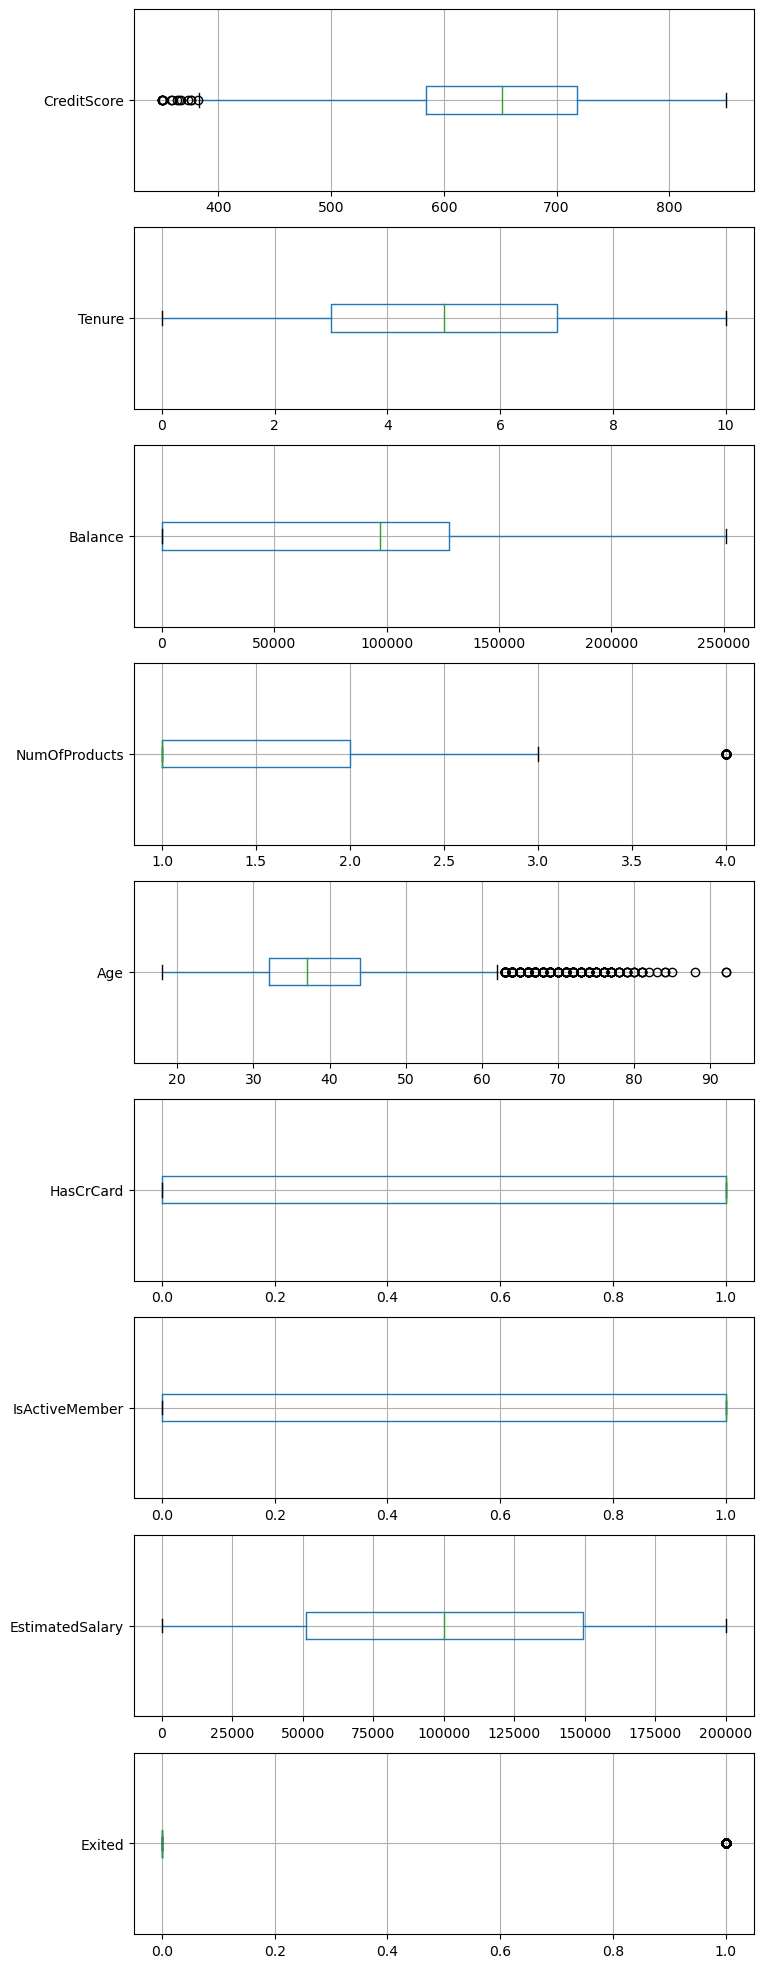

In [16]:
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

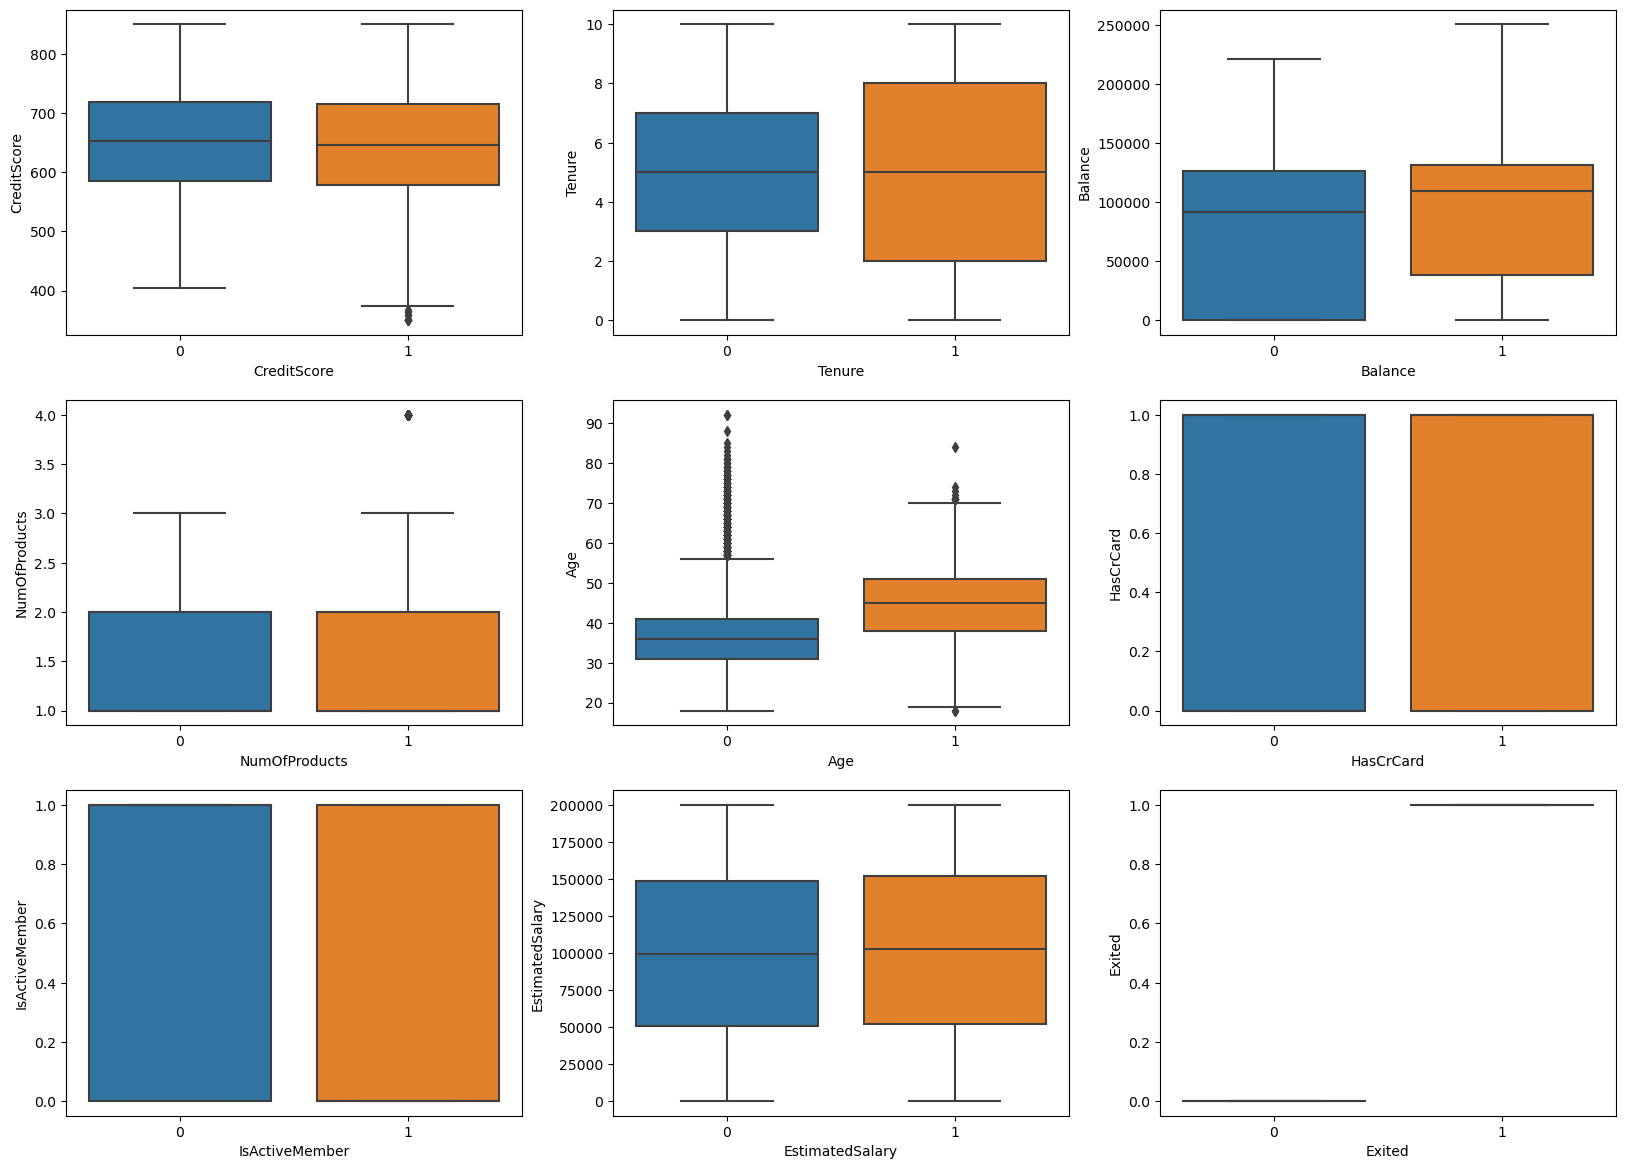

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Exited", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

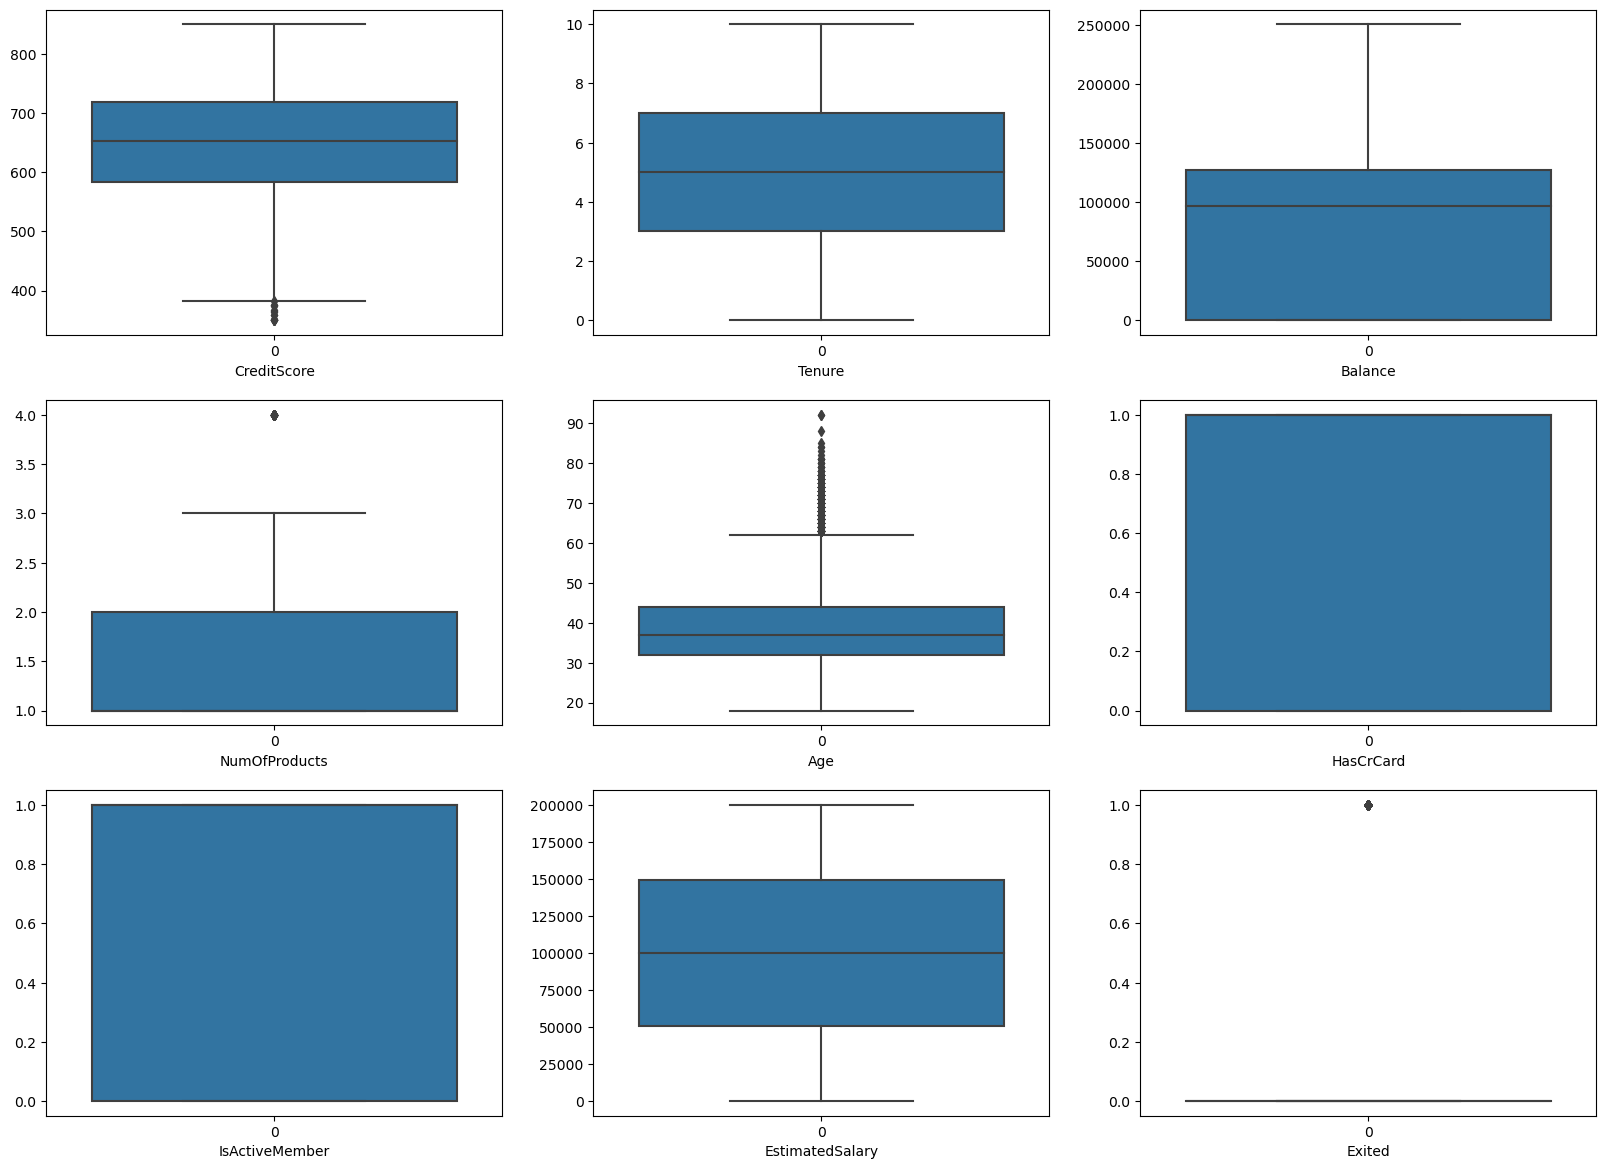

In [18]:
# boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [19]:
df[(df['Age']) >77 ]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
252,253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0
766,767,15810864,Williamson,700,France,Female,82,2,0.00,2,0,1,182055.36,0
2458,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,3034,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,3388,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,3532,15653251,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
3651,3652,15628999,Townsend,732,France,Male,79,10,61811.23,1,1,1,104222.80,0
3994,3995,15763097,Siciliano,809,Spain,Male,80,8,0.00,2,0,1,34164.05,0
4590,4591,15680167,Thomson,635,France,Female,78,6,47536.40,1,1,1,119400.08,0


In [20]:
df.drop(df[df['Age'] > 72].index, inplace=True)

<Axes: >

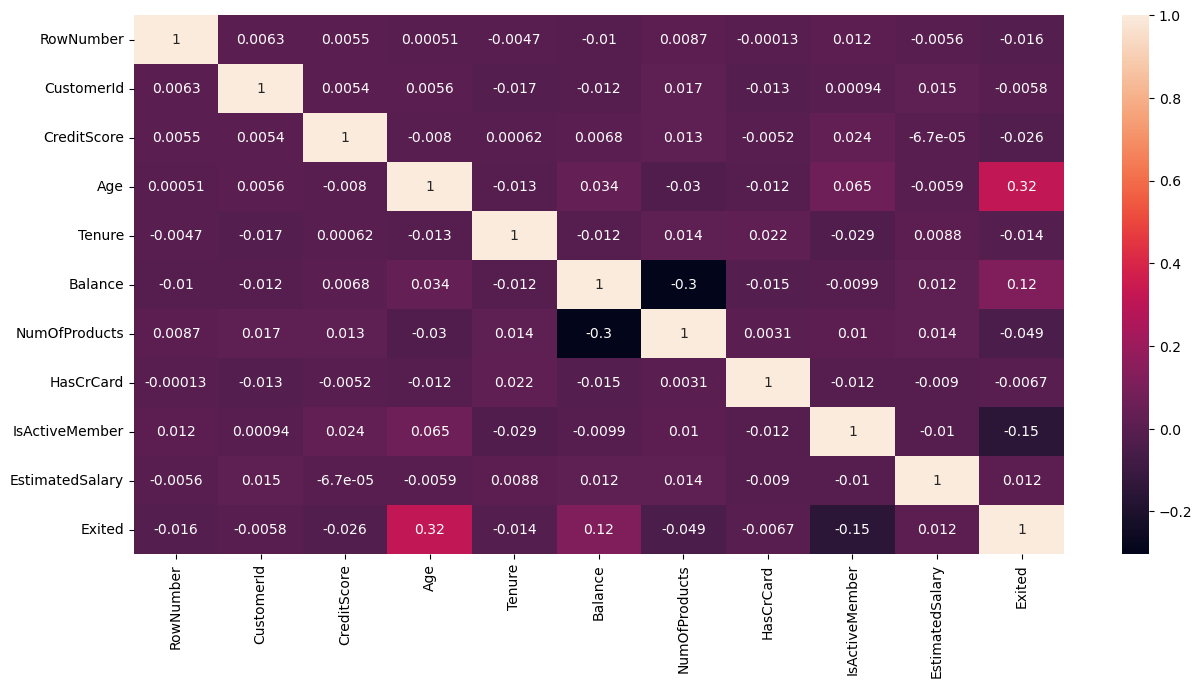

In [21]:
cor_mat=df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [22]:
cat_features=['Geography', 'Gender']

In [23]:
#  #check count based on categorical features

# plt.figure(figsize=(15,80), facecolor='white')
# plotnumber =1
# for cat_features in cat_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.countplot(y=cat_features,data=df)
#     plt.xlabel(cat_features)
#     plt.title(cat_features)
#     plotnumber+=1
# plt.show()

In [24]:
# for cat_features in cat_features:
#     sns.catplot(x='Exited', col=cat_features, kind='count', data= df)
# plt.show()

In [25]:
# fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# data = df['marital'].value_counts()
# barplot = data.plot(kind='pie', ax=axes[0], title='MARITAL', autopct="%.2f", fontsize=14, ylabel='')
# countplot = sns.countplot(x='Marital', data=df, ax=axes[1])

In [26]:
#EDA

In [27]:
df.duplicated().sum()


0

In [28]:
dataset2 = df.drop(['Surname', 'RowNumber', 'CustomerId','HasCrCard'], axis=1)
dataset2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9915 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9915 non-null   int64  
 1   Geography        9915 non-null   object 
 2   Gender           9915 non-null   object 
 3   Age              9915 non-null   int64  
 4   Tenure           9915 non-null   int64  
 5   Balance          9915 non-null   float64
 6   NumOfProducts    9915 non-null   int64  
 7   IsActiveMember   9915 non-null   int64  
 8   EstimatedSalary  9915 non-null   float64
 9   Exited           9915 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 852.1+ KB


In [29]:
another_encodata = pd.get_dummies(dataset2, drop_first=True, dtype = int)
dataset3 = another_encodata

dataset3.head(10)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9915 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9915 non-null   int64  
 1   Age                9915 non-null   int64  
 2   Tenure             9915 non-null   int64  
 3   Balance            9915 non-null   float64
 4   NumOfProducts      9915 non-null   int64  
 5   IsActiveMember     9915 non-null   int64  
 6   EstimatedSalary    9915 non-null   float64
 7   Exited             9915 non-null   int64  
 8   Geography_Germany  9915 non-null   int32  
 9   Geography_Spain    9915 non-null   int32  
 10  Gender_Male        9915 non-null   int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 813.3 KB


In [30]:
dataset3.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,71725.73,0,0,0,1


In [31]:
dataset3.describe

<bound method NDFrame.describe of       CreditScore  Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0             619   42       2       0.00              1               1   
1             608   41       1   83807.86              1               1   
2             502   42       8  159660.80              3               0   
3             699   39       1       0.00              2               0   
4             850   43       2  125510.82              1               1   
...           ...  ...     ...        ...            ...             ...   
9995          771   39       5       0.00              2               0   
9996          516   35      10   57369.61              1               1   
9997          709   36       7       0.00              1               1   
9998          772   42       3   75075.31              2               0   
9999          792   28       4  130142.79              1               0   

      EstimatedSalary  Exited  Geography_Germany  Geo

In [32]:
num_features=['CreditScore', 'Tenure', 'Balance',
       'Age','EstimatedSalary']

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

dataset3[num_features] = scaler.fit_transform(dataset3[num_features])

In [34]:
dataset3

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.444444,0.2,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.425926,0.1,0.334031,1,1,0.562709,0,0,1,0
2,0.304,0.444444,0.8,0.636357,3,0,0.569654,1,0,0,0
3,0.698,0.388889,0.1,0.000000,2,0,0.469120,0,0,0,0
4,1.000,0.462963,0.2,0.500246,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.388889,0.5,0.000000,2,0,0.481341,0,0,0,1
9996,0.332,0.314815,1.0,0.228657,1,1,0.508490,0,0,0,1
9997,0.718,0.333333,0.7,0.000000,1,1,0.210390,1,0,0,0
9998,0.844,0.444444,0.3,0.299226,2,0,0.464429,1,1,0,1


In [35]:
X1 = dataset3.drop('Exited',axis=1)
y1 = dataset3['Exited']

In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42, stratify=y1)

In [37]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train,y1_train, test_size=0.25, random_state=42, stratify=y1_train)

In [38]:
y1_train.value_counts()

Exited
0    4729
1    1220
Name: count, dtype: int64

In [39]:
len(X1_train),len(X1_test),len(X1_val)

(5949, 1983, 1983)

In [40]:
len(y1_train),len(y1_test),len(y1_val)

(5949, 1983, 1983)

In [41]:
from imblearn.over_sampling import SMOTE
X1_res, y1_res = SMOTE().fit_resample(X1_train,y1_train)

In [42]:
y1_res.value_counts()

Exited
0    4729
1    4729
Name: count, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score


In [44]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [45]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 1000)
logr.fit(X1_res, y1_res)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.7332324760463943
Precision =  0.41210374639769454
Recall =  0.7027027027027027
F1 Score =  0.51952770208901


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_res, y1_res)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.745839636913767
Precision =  0.42684766214177977
Recall =  0.6953316953316954
F1 Score =  0.5289719626168224


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 100, max_depth=6, min_samples_leaf=8)
dt.fit(X1_res, y1_res)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.7957639939485628
Precision =  0.5016339869281046
Recall =  0.7542997542997543
F1 Score =  0.6025515210991168


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state = 100, max_depth=6, min_samples_leaf=8)
rf.fit(X1_res, y1_res)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8083711548159355
Precision =  0.5243243243243243
Recall =  0.714987714987715
F1 Score =  0.604989604989605


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [50]:
models_list = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [51]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },
    
    'dt_hyperparameters': {
        
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }
}

In [52]:
type(model_hyperparameters)

dict

In [53]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'dt_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [54]:
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [55]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'dt_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [56]:
model_keys[0]

'log_reg_hyperparameters'

In [57]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

In [58]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    grid_search = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    grid_search.fit(X1_val,y1_val)

    result.append({
        'model used' : model,
        'highest score' : grid_search.best_score_,
        'best hyperparameters' : grid_search.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [59]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
---------------------------------
DecisionTreeClassifier()
{'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100], 'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=1000),0.811900,{'C': 5}
1,DecisionTreeClassifier(),0.820479,"{'max_depth': 10, 'min_samples_leaf': 4}"
2,KNeighborsClassifier(),0.816433,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.855768,"{'max_depth': None, 'min_samples_leaf': 4, 'n_..."


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=4)
rf.fit(X1_res, y1_res)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

# #With all o-handling
# Accuracy =  0.7890098496630379
# Precision =  0.4851063829787234
# Recall =  0.5801526717557252
# F1 Score =  0.5283893395133257
# Accuracy =  0.813
# Precision =  0.5304990757855823
# Recall =  0.7051597051597052
# F1 Score =  0.6054852320675106

Accuracy =  0.8154311649016641
Precision =  0.5402750491159135
Recall =  0.6756756756756757
F1 Score =  0.6004366812227073


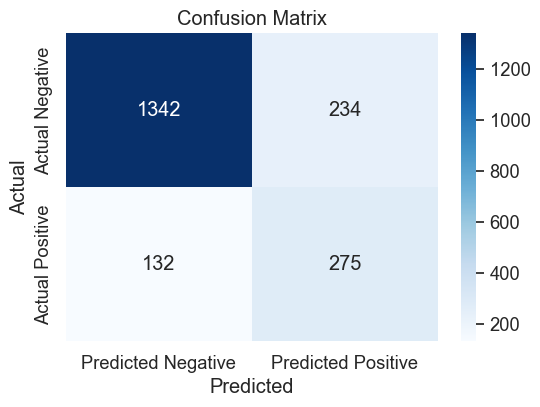

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


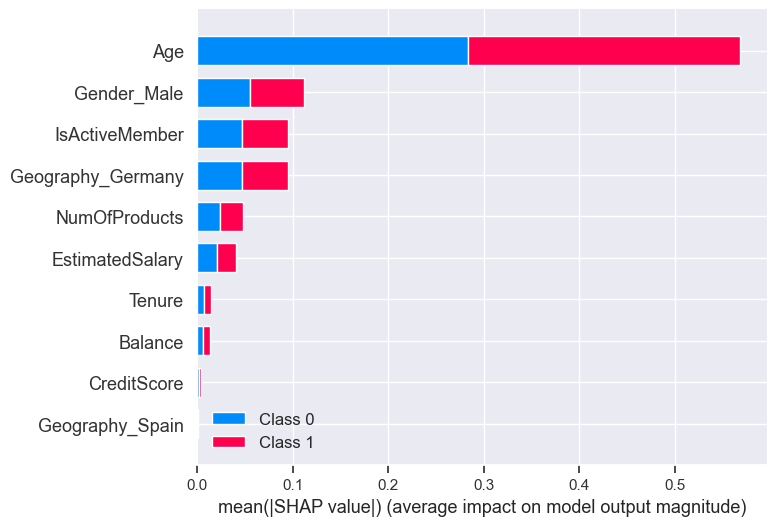

In [62]:
import shap

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(rf)

# Calculate SHAP values for a specific instance (e.g., the first instance in your test data)
shap_values = explainer.shap_values(X1_test.iloc[0, :].values.reshape(1, -1))

# Visualize the SHAP values for the instance
shap.summary_plot(shap_values, X1_test)


In [63]:
# pip install lime

In [64]:
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X1_test.values, training_labels=y1_res, mode="classification")

explanation = explainer.explain_instance(X1_test.values[0], rf.predict_proba)




X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [65]:
explanation.show_in_notebook()


In [66]:
 explanation.as_list()


[('1 <= 0.26', -0.2544522977909923),
 ('4 <= 1.00', 0.12753736265626944),
 ('5 <= 0.00', 0.12137880608324365),
 ('0.00 < 9 <= 1.00', -0.06670858776270008),
 ('0.38 < 3 <= 0.51', 0.030797779386974044),
 ('2 <= 0.25', 0.0077225580584604865),
 ('7 <= 0.00', -0.005587712831369329),
 ('6 > 0.75', -0.0018766095888020262),
 ('8 <= 0.00', 0.0015527382871236989),
 ('0.48 < 0 <= 0.61', -9.006864815950634e-05)]

In [67]:
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.datasets import make_classification

# Display the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y1))

# Create an ADASYN resampler
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

# Apply ADASYN to balance the dataset
X_resampled, y_resampled = adasyn.fit_resample(X1_train, y1_train)

# Display the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_resampled))


Class distribution before ADASYN: Counter({0: 7881, 1: 2034})
Class distribution after ADASYN: Counter({0: 4729, 1: 4671})


In [68]:
y_resampled.value_counts()

Exited
0    4729
1    4671
Name: count, dtype: int64

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=4)
rf.fit(X_resampled, y_resampled)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)


# Accuracy =  0.821986888552698
# Precision =  0.5513307984790875
# Recall =  0.7125307125307125
# F1 Score =  0.6216505894962486

Accuracy =  0.8048411497730711
Precision =  0.5181159420289855
Recall =  0.7027027027027027
F1 Score =  0.5964546402502606


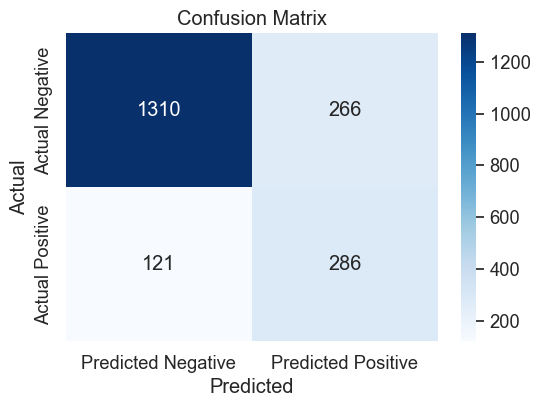

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.datasets import make_classification


# Display the class distribution before SMOTE-ENN
print("Class distribution before SMOTE-ENN:", Counter(y1))

# Create a SMOTE-ENN resampler
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Apply SMOTE-ENN to balance the dataset
X_resampled2, y_resampled2 = smote_enn.fit_resample(X1_train, y1_train)

# Display the class distribution after SMOTE-ENN
print("Class distribution after SMOTE-ENN:", Counter(y_resampled2))


Class distribution before SMOTE-ENN: Counter({0: 7881, 1: 2034})
Class distribution after SMOTE-ENN: Counter({1: 3920, 0: 2990})


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=2)
rf.fit(X_resampled2, y_resampled2)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)


Accuracy =  0.7861825516893596
Precision =  0.4869029275808937
Recall =  0.7764127764127764
F1 Score =  0.5984848484848485


In [73]:
# Accuracy =  0.821986888552698
# Precision =  0.5513307984790875
# Recall =  0.7125307125307125
# F1 Score =  0.6216505894962486